# Linear Regression Models
### Drone acceleration prediction

In [1]:
from Tasks import *
import numpy as np
import pandas as pd

In [2]:
q = Tasks(full_dataset_filename='../dataset/Training_Data.csv', 
         judge_filename='../dataset/Training_Data_Old.csv')

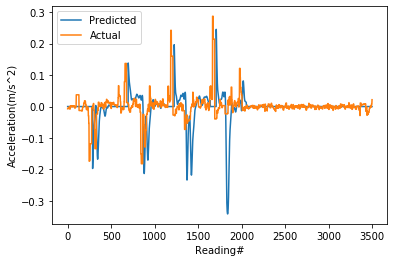

In [3]:
# plot calculated method results (goal to beat)
import matplotlib.pyplot as plt
y_calc = q.full_dataset[' Calculated_Acceleration']
y_true = q.full_dataset[' Logged_Acceleration']
plt.plot(y_calc[-3500:].reset_index(drop=True))
plt.plot(y_true[-3500:].reset_index(drop=True))
plt.ylabel("Acceleration(m/s^2)")
plt.xlabel("Reading#")
plt.legend(['Predicted', 'Actual'], loc='upper left')
plt.show()

In [4]:
# One hot encoding
one_hot_dataset = q.Q_02(q.full_dataset)
#one_hot_dataset = one_hot_dataset.drop([' Calculated_Acceleration'], axis=1)
one_hot_dataset = one_hot_dataset.drop([' Voltage'], axis=1)

In [5]:
# Find any missing values and fill them with the mean
missing_count, revised_full_dataset = q.Q_03(one_hot_dataset)
# print(missing_count)

---HEAD---

      Current   MR_Crater   MR_Peak   MinCrater   MaxPeak    Average   Rising   Calculated_Acceleration   Logged_Acceleration  State_2  State_3
0  10.740934   10.731553       0.0    0.000000       0.0  10.740934        1                       0.0              0.005015        1        0
1  10.749449   10.731553       0.0   10.731553       0.0  10.749449        1                       0.0              0.005015        1        0
2  10.756581   10.731553       0.0   10.731553       0.0  10.756581        1                       0.0              0.002583        1        0
3  10.761886   10.731553       0.0   10.731553       0.0  10.761886        1                       0.0              0.002583        1        0
4  10.765013   10.731553       0.0   10.731553       0.0  10.765013        1                       0.0              0.002583        1        0

---SHAPE---

 (14033, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14033 entries, 0 to 14032
Data columns (total 11 col

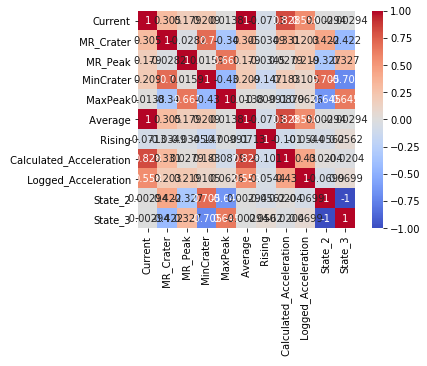

In [6]:
q.EDA(revised_full_dataset)

In [7]:
X, y = q.feature_target_split(revised_full_dataset, ' Logged_Acceleration')

In [8]:
# split into train/test data (test last 3500 samples)
test_size = 3500
X_train = X[:-test_size]
y_train = y[:-test_size]
X_test = X[-test_size:]
y_test = y[-test_size:]

In [9]:
# scale data
X_train_scaled, X_test_scaled, y_train, y_test = q.standardizer(X_train, X_test, y_train, y_test)

Close-form Model
RMSE:  0.047003148468525234


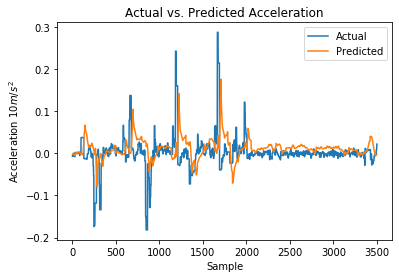

In [10]:
# Close-form solution Linear Regression (HW)
print("Close-form Model")
_, y_pred, RMSE = q.Q_10(X_train_scaled, X_test_scaled, y_train, y_test)
q.results(y_test, y_pred, RMSE)

Linear Regression Model
RMSE:  0.0025859958527304464


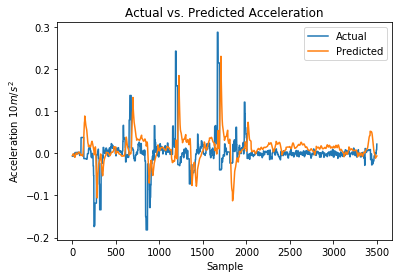

In [11]:
# Sklearn linear regression basic model
print("Linear Regression Model")
y_pred, RMSE = q.linear_regression(X_train_scaled, X_test_scaled, y_train, y_test)
q.results(y_test, y_pred, RMSE)

Stochastic Gradient Descent Model
RMSE:  0.07294304885570398


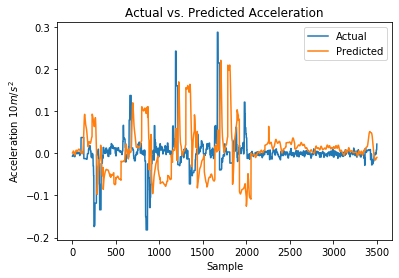

In [12]:
# Stochastic gradient descent (HW)
print("Stochastic Gradient Descent Model")
_, y_pred, RMSE, _ = q.Q_12(X_train_scaled, X_test_scaled, y_train, y_test)
q.results(y_test, y_pred, RMSE)

Stochastic Gradient Descent Model
RMSE:  0.002536105411646945


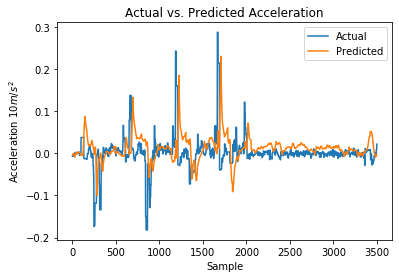

In [13]:
# predict with sklearn SGD regression model
print("Stochastic Gradient Descent Model")
y_pred, RMSE = q.SGD(X_train_scaled, X_test_scaled, y_train, y_test)
q.results(y_test, y_pred, RMSE)

RMSE:  0.3177460859937275


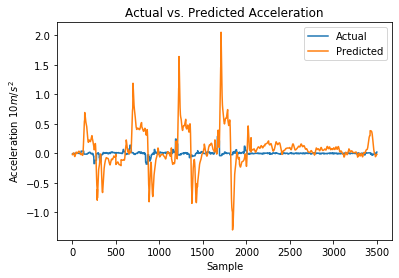

In [14]:
# Mini-batch gradient descent
_, y_pred, RMSE, _ = q.Q_13(X_train_scaled, X_test_scaled, y_train, y_test)
q.results(y_test, y_pred, RMSE)

---HEAD---

     Current   MR_Crater   MR_Peak   MinCrater   MaxPeak   Average   Rising   Calculated_Acceleration   Logged_Acceleration  State_2   State_3
0  0.470062    0.521586       0.0    0.000000       0.0  0.470062      1.0                  0.620046                   1.0      0.0  0.005015
1  0.470810    0.521586       0.0    0.686677       0.0  0.470810      1.0                  0.620046                   1.0      0.0  0.005015
2  0.471437    0.521586       0.0    0.686677       0.0  0.471437      1.0                  0.620046                   1.0      0.0  0.002583
3  0.471903    0.521586       0.0    0.686677       0.0  0.471903      1.0                  0.620046                   1.0      0.0  0.002583
4  0.472178    0.521586       0.0    0.686677       0.0  0.472178      1.0                  0.620046                   1.0      0.0  0.002583

---SHAPE---

 (10533, 11)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10533 entries, 0 to 10532
Data columns (total 11 columns):

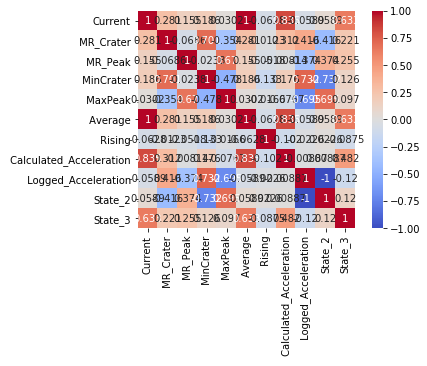

In [15]:
# using min-max scaler
X_train_scaled, X_test_scaled, y_train, y_test = q.min_max_scaler(X_train, X_test, y_train, y_test)
norm_dataset = np.append(X_train_scaled, y_train, 1)
norm_dataset = pd.DataFrame(norm_dataset)
norm_dataset.columns = revised_full_dataset.columns
q.EDA(norm_dataset)

RMSE:  0.0025859958527304425


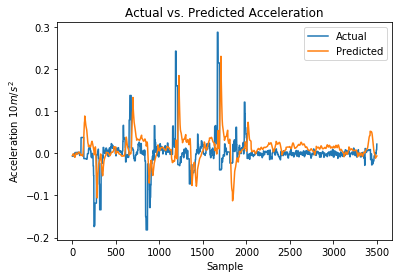

In [16]:
# redo linear regression
y_pred, RMSE = q.linear_regression(X_train_scaled, X_test_scaled, y_train, y_test)
q.results(y_test, y_pred, RMSE)

RMSE:  0.002176553177162202


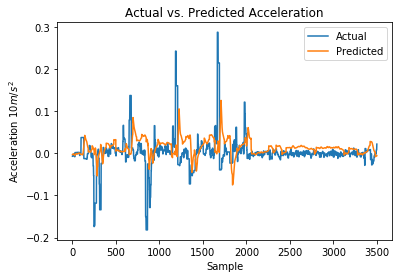

In [17]:
# redo SGD
y_pred, RMSE = q.SGD(X_train_scaled, X_test_scaled, y_train, y_test)
q.results(y_test, y_pred, RMSE)

RMSE:  0.002584830430816511


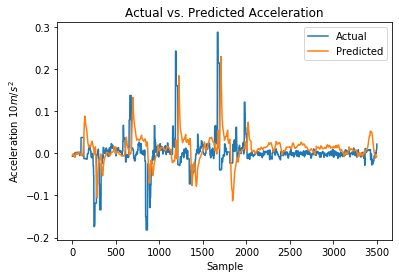

In [18]:
# ridge regression
y_pred, RMSE = q.ridge(X_train_scaled, X_test_scaled, y_train, y_test)
q.results(y_test, y_pred, RMSE)

In [19]:
# SGD with min-max-scaling performs the best, error-wise, but has low peaks.
# Closed-form model with standardization or min-max scaling performs best visually.
# Could be something limiting SGD prediction range?